In [3]:
import os
os.chdir('..')

In [4]:
import numpy as np
import pandas as pd
import torch.nn as nn

from sklearn.model_selection import train_test_split

import pickle

# import wordcloud
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer

from utils.TextProcessing import preprocess_text, tokenize, uncontract, lowercase, remove_punctuation
from utils.TokenProcessing import preprocess_text

ps = PorterStemmer()
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Kyriakos\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Kyriakos\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Kyriakos\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Kyriakos\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Kyriakos\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [5]:
df = pd.read_csv('dataset\listings_comments.csv')


In [6]:
pd.set_option('display.max_colwidth', None)
# revoke the display limit of the number of columns
pd.set_option('display.max_columns', None)

In [7]:
label  = df['review_scores_rating'].values

In [8]:
print(df['comments'].isna().sum())
# fill the nan values in the comments column with 'nan_value'
df['comments'].fillna('nan_value', inplace=True)

682


In [28]:
positive_df = df[df['review_scores_rating'] >= 4.5]
# neutral_df between 4.1 and 4.5
neutral_df = df[(df['review_scores_rating'] >= 4.0) & (df['review_scores_accuracy'] < 4.5)]
# negative_df less than 4.1
negative_df = df[df['review_scores_rating'] < 4.0]

positive_df.shape, neutral_df.shape, negative_df.shape

((5864, 76), (263, 76), (60, 76))

In [29]:
positive_description = positive_df['description'].values
neutral_description = neutral_df['description'].values
negative_description = negative_df['description'].values


In [30]:
# split to individual words
for i in range(len(positive_description)):
    if type(positive_description[i]) != float:
        positive_description[i] = positive_description[i].split()
    else:
        positive_description[i] = []

        
for i in range(len(neutral_description)):
    if type(neutral_description[i]) != float:
        neutral_description[i] = neutral_description[i].split()
    else:
        neutral_description[i] = []

for i in range(len(negative_description)):
    if type(negative_description[i]) != float:
        negative_description[i] = negative_description[i].split()
        
    else:
        negative_description[i] = []

In [31]:
positive_description[:3]

array([list(['Quiet', 'Garden', 'View', 'Room', '&', 'Super', 'Fast', 'Wi-Fi<br', '/><br', '/><b>The', 'space</b><br', "/>I'm", 'renting', 'a', 'bedroom', '(room', 'overlooking', 'the', 'garden)', 'in', 'my', 'apartment', 'in', 'Amsterdam,', '<br', '/><br', '/>The', 'room', 'is', 'located', 'to', 'the', 'east', 'of', 'the', 'city', 'centre', 'in', 'a', 'quiet,', 'typical', 'Amsterdam', 'neighbourhood,', 'the', '"Indische', 'Buurt".', 'Amsterdam’s', 'historic', 'centre', 'is', 'less', 'than', '15', 'minutes', 'away', 'by', 'bike', 'or', 'tram.<br', '/><br', '/><br', '/>The', 'features', 'of', 'the', 'room', 'are:<br', '/><br', '/>-', 'Twin', 'beds', '(80', 'x', '200', 'cm,', 'pure', 'cotton', 'bed', 'linen)', '<br', '/>-', '2', 'pure', 'cotton', 'towels', 'for', 'each', 'guest', '<br', '/>-', 'reading', 'lamps<br', '/>-', 'bedside', 'table<br', '/>-', 'wardrobe<br', '/>-', 'table', 'with', 'chairs<br', '/>-', 'tea', 'and', 'coffee', 'making', 'facilities<br', '/>-', 'mini', 'bar<br', '/

In [33]:
# lower case, remove punctuation, uncontract, lemmatize
positive_description = [preprocess_text(text, "lemmatization") for text in positive_description]
neutral_description = [preprocess_text(text, "lemmatization") for text in neutral_description]
negative_description = [preprocess_text(text, "lemmatization") for text in negative_description]

# remove "br" and "n" withing strings e.g 'wi-fi<br'--> 'wi-fi'


In [37]:
for i in range(len(positive_description)):
    for j in range(len(positive_description[i])):
        positive_description[i][j] = positive_description[i][j].replace('br', '').replace('/n', '')

for i in range(len(neutral_description)):
    for j in range(len(neutral_description[i])):
        neutral_description[i][j] = neutral_description[i][j].replace('br', '').replace('/n', '')

for i in range(len(negative_description)):
    for j in range(len(negative_description[i])):
        negative_description[i][j] = negative_description[i][j].replace('br', '').replace('/n', '')

        



In [38]:
# plot wordcloud
positive_description = [item for sublist in positive_description for item in sublist]
neutral_description = [item for sublist in neutral_description for item in sublist]
negative_description = [item for sublist in negative_description for item in sublist]


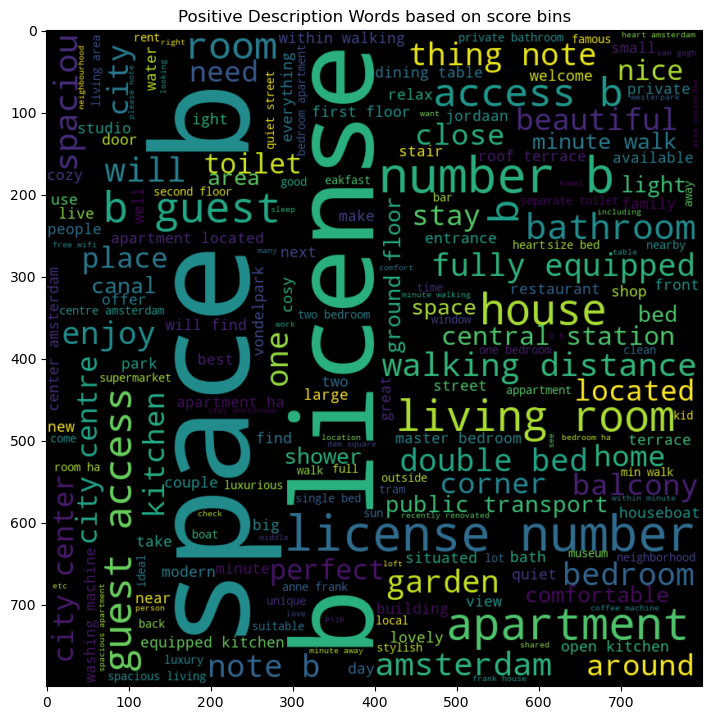

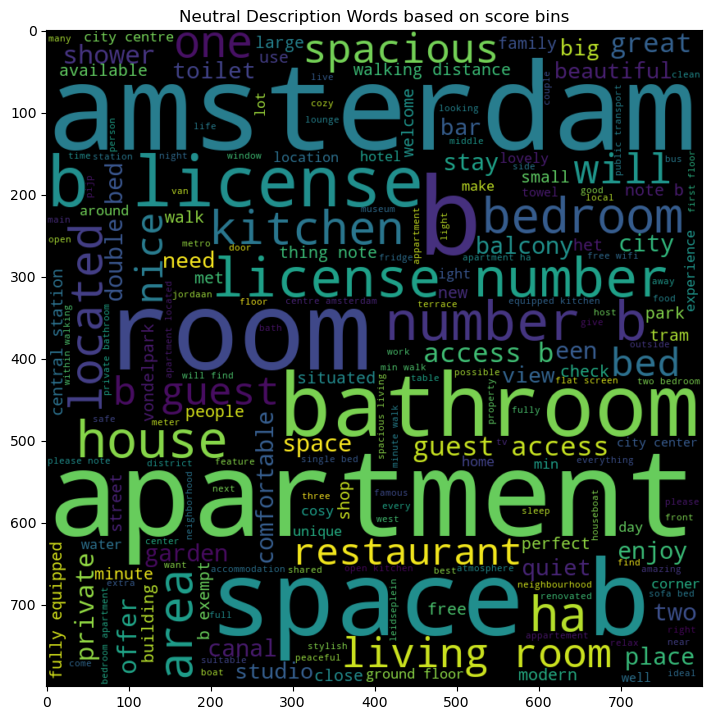

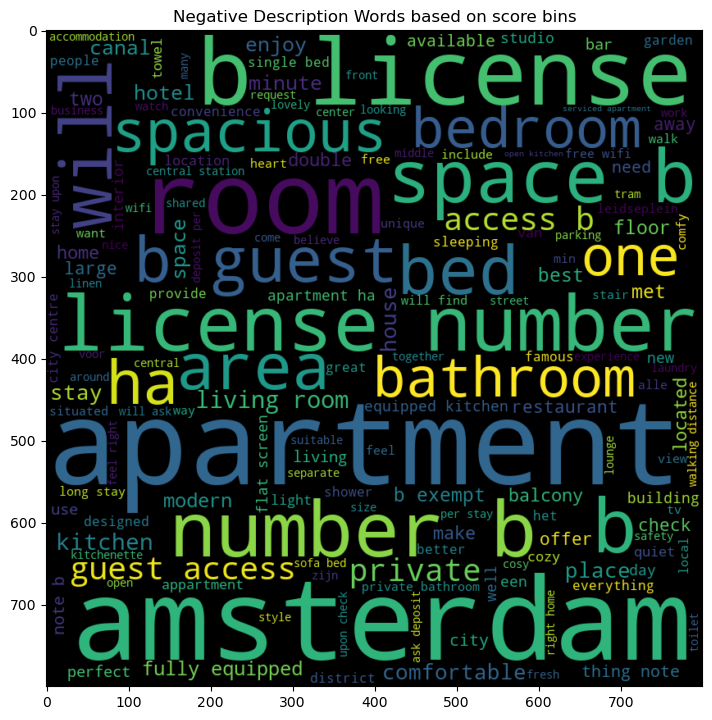

In [49]:
positive_wordcloud = WordCloud(width = 800, height = 800,
                background_color ='black',  
                min_font_size = 10).generate(' '.join(positive_description))

neutral_wordcloud = WordCloud(width = 800, height = 800,
                background_color ='black',
                min_font_size = 10).generate(' '.join(neutral_description))

negative_wordcloud = WordCloud(width = 800, height = 800,
                background_color ='black',
                min_font_size = 10).generate(' '.join(negative_description))

# plot the WordCloud image
def plot_wordcloud(wordcloud, title = None):
    plt.figure(figsize=(12, 7))
    plt.title(title)
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.tight_layout(pad = 0)
    plt.show()


plot_wordcloud(positive_wordcloud, title = 'Positive Description Words based on score bins')
plot_wordcloud(neutral_wordcloud, title = 'Neutral Description Words based on score bins')
plot_wordcloud(negative_wordcloud, title = 'Negative Description Words based on score bins')



## WordCloud for comments

In [8]:
%%time


positive_comments = [str(comment) for comment in positive_df['comments'] if isinstance(comment, str)]
positive_comments = ''.join(positive_comments).split()

neutral_comments = [str(comment) for comment in neutral_df['comments'] if isinstance(comment, str)]
neutral_comments = ''.join(neutral_comments).split()

negative_comments = [str(comment) for comment in negative_df['comments'] if isinstance(comment, str)]
negative_comments = ''.join(negative_comments).split()

CPU times: total: 1.33 s
Wall time: 1.33 s


In [9]:
%%time


# preprocess the comments with stemming
processed_positive_comments = preprocess_text(positive_comments, "lemmatization")
processed_neutral_comments = preprocess_text(neutral_comments, "lemmatization")
processed_negative_comments = preprocess_text(negative_comments, "lemmatization")

KeyboardInterrupt: 

In [46]:
# remove neutral and popular words like "amstermdam", "location", "apartment", "br", "place"  comments
remove_words = ["amsterdam", "location", "apartment", "br", "place", "house", "room", "flat", "home", "host"]
processed_positive_comments = [word for word in processed_positive_comments if word not in remove_words]
processed_neutral_comments = [word for word in processed_neutral_comments if word not in remove_words]
processed_negative_comments = [word for word in processed_negative_comments if word not in remove_words]


In [45]:
"br" in processed_positive_comments

["['daniel",
 'really',
 'cool.',
 'nice',
 'clean.',
 'quiet',
 'neighborhood.',
 'map',
 'lonely',
 'planet']

In [22]:
# apply the wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# positive comments
positive_wordcloud = WordCloud(width=800, height=500, max_font_size=110, collocations=False).generate(' '.join(positive_comments))
neutral_wordcloud = WordCloud(width=800, height=500, max_font_size=110, collocations=False).generate(' '.join(neutral_comments))
negative_wordcloud = WordCloud(width=800, height=500, max_font_size=110, collocations=False).generate(' '.join(negative_comments))


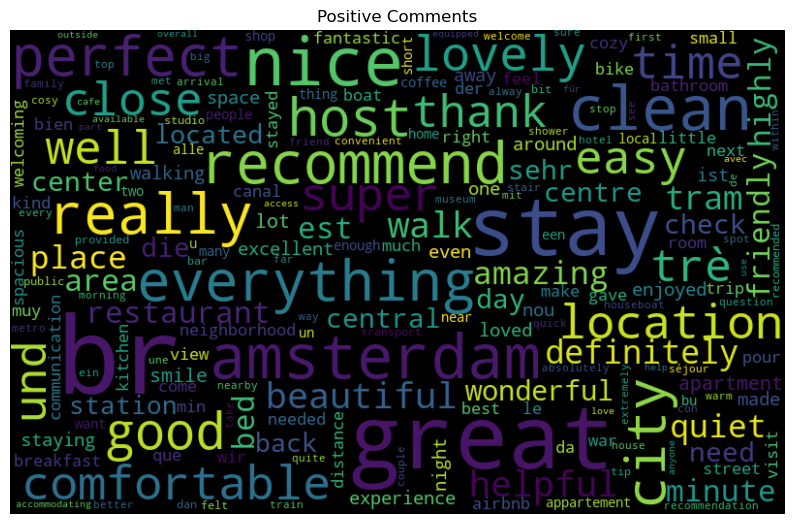

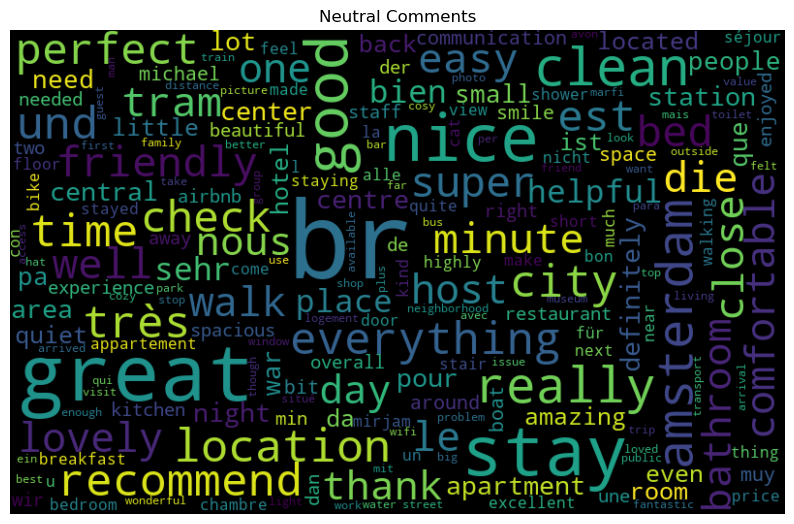

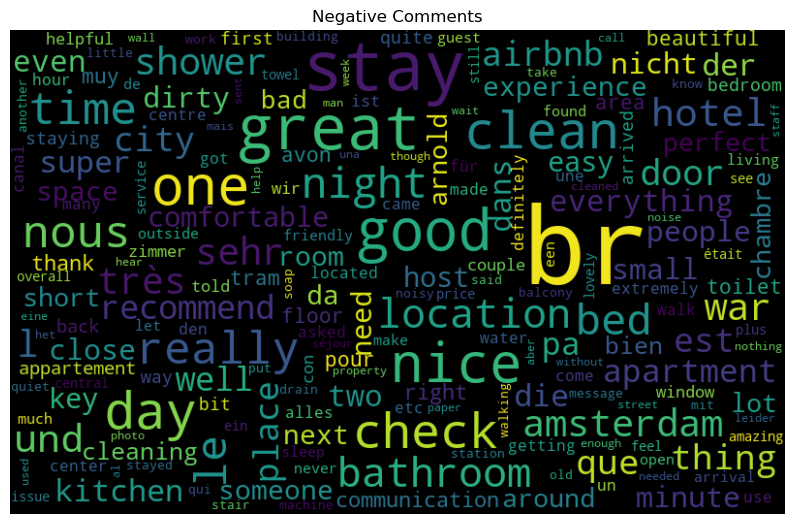

In [23]:
def plot_wordcloud(wordcloud, title):
    plt.figure(figsize=(10, 7))
    plt.title(title)
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.show()

plot_wordcloud(positive_wordcloud, "Positive Comments")
plot_wordcloud(neutral_wordcloud, "Neutral Comments")
plot_wordcloud(negative_wordcloud, "Negative Comments")

### Ngrams

In [ ]:
# # import countvectorizer
# from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# def extract_ngrams(data, ngram_range=(1, 2), max_features = 1500 , transform = "count"):
#     if transform == "count":
#         n_grams = CountVectorizer(
#             ngram_range  = ngram_range, 
#             tokenizer    = _,
#             preprocessor = _, 
#             max_features  = max_features,
#             min_df       = 10,
#             max_df       = 0.8
#         )
#     else:
#         n_grams = TfidfVectorizer(
#         ngram_range  = ngram_range,
#         max_features = max_features,
#         tokenizer    = _,
#         preprocessor = _, 
#         min_df       = 10,
#         max_df       = 0.8
#     )

In [34]:
%%time


positive_comments = [str(comment) for comment in positive_df['comments'] if isinstance(comment, str)]
positive_comments = ''.join(positive_comments).split()
# convert each word to str
# positive_comments = [str(word) for word in positive_comments]

neutral_comments = [str(comment) for comment in neutral_df['comments'] if isinstance(comment, str)]
neutral_comments = ''.join(neutral_comments).split()

negative_comments = [str(comment) for comment in negative_df['comments'] if isinstance(comment, str)]
negative_comments = ''.join(negative_comments).split()

CPU times: total: 1.58 s
Wall time: 1.59 s


In [35]:
# remove all variations of "br" from the comments
positive_comments = [word for word in positive_comments if "br" not in word]
neutral_comments = [word for word in neutral_comments if "br" not in word]
negative_comments = [word for word in negative_comments if "br" not in word]



In [36]:
# remove numbers from the comments
positive_comments = [word for word in positive_comments if not word.isdigit()]
neutral_comments = [word for word in neutral_comments if not word.isdigit()]
negative_comments = [word for word in negative_comments if not word.isdigit()]


In [46]:
positive_comments[50:65]

['amazing',
 'host!',
 'His',
 'place',
 'is',
 'extremely',
 'clean,',
 'and',
 'he',
 'provides',
 'everything',
 'you',
 'could',
 'possibly',
 'want']

In [47]:
positive_comments[1]
type(positive_comments[1])

str

In [50]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer


# def get_top_bigrams(corpus, n=None, norm="Count"):
#     if norm == "Count":
#         vec = CountVectorizer(ngram_range=(2, 2), stop_words='english', min_df=10, max_df=0.8).fit(corpus)
#     else:
#         vec = TfidfVectorizer(ngram_range=(2, 2), stop_words='english').fit(corpus)

#     bag_of_words = vec.transform(corpus)
#     sum_words = bag_of_words.sum(axis=0)
#     words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
#     words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)

#     return words_freq[:n]

# def get_top_bigrams(corpus, n=None, norm="Count"):
#     if norm == "Count":
#         vec = CountVectorizer(ngram_range=(2, 2), stop_words='english', min_df=10, max_df=0.8).fit(corpus)
#     else:
#         vec = TfidfVectorizer(ngram_range=(2, 2), stop_words='english').fit(corpus)

#     bag_of_words = vec.transform(corpus)
#     sum_words = bag_of_words.sum(axis=0)
#     words_freq = [(word.split()[0], word.split()[1], sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
#     words_freq = sorted(words_freq, key=lambda x: x[2], reverse=True)

    # return words_freq[:n]


# modifies so that negation words are not removed
def get_top_bigrams(corpus, n=None, norm="Count"):
    if norm == "Count":
        vec = CountVectorizer(ngram_range=(2, 2), stop_words= 'english').fit(corpus)
    else:
        # Customize the stop words to exclude negation words
        stop_words = text.ENGLISH_STOP_WORDS.difference(["not", "doesn't", "did not"])
        vec = TfidfVectorizer(ngram_range=(2, 2), stop_words=stop_words).fit(corpus)

    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word.split()[0], word.split()[1], sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[2], reverse=True)

    return words_freq[:n]



In [51]:
# pos_top_ngrams = get_top_bigrams(positive_comments, n=20, norm="Count")
neg_top_ngrams = get_top_bigrams(negative_comments, n=20, norm="Count")

In [52]:
neg_top_ngrams

[('wi', 'fi', 3),
 ('qu', 'il', 3),
 ('centre', 'ville', 2),
 ('mid', 'stay', 2),
 ('easy', 'going', 2),
 ('rendez', 'vous', 2),
 ('covid', 'post', 1),
 ('stay', 'david', 1),
 ('posting', 'nice', 1),
 ('recommend', 'disponibilità', 1),
 ('hallway', 'entrance', 1),
 ('stovetop', 'oven', 1),
 ('night', 'life', 1),
 ('life', 'party', 1),
 ('red', 'light', 1),
 ('coffee', 'espresso', 1),
 ('premium', 'xa0', 1),
 ('цельсия', 'yays', 1),
 ('posting', 'ein', 1),
 ('luck', 'très', 1)]